# Multidof simulation Runga-Kutta

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import eig
import cmath
import math

## Functions

In [4]:
def ExitationFunction(t):
    a = 1
    b = 2
    if (t<b)and(t>a):
        dis = -(t-a)*(t-b)
        vel  = -(t-a) - (t-b)

    else:
        dis = 0
        vel  = 0
    return dis,vel

def ForcingFunction(t):
    return 5*np.sin(10*t)

def DerivativeX(X,t):
    #print(X)
    Xdis = X[0:len(M)]
    Xvel = X[len(M):]
    F = np.zeros(len(M))
    #print(Xdis,Xvel)
    
    
    ### Forcing a displacement on a mass:
    #Xdis[0],Xvel[0] = ExitationFunction(t)
    ### Forcing with a forcing function:
    F[2] = ForcingFunction(t)
        
    term1 = np.matmul(-np.linalg.inv(M), K)
    term2 = np.matmul(-np.linalg.inv(M), C)
    term3 = np.matmul(np.linalg.inv(M), F)  
    xdd = np.matmul(term1,Xdis) + np.matmul(term2,Xvel) + term3
    
    return np.append(Xvel,xdd)
def SolveSystem(t):
    return odeint(DerivativeX,InitialConditions,t)





## Problem setup and solve 

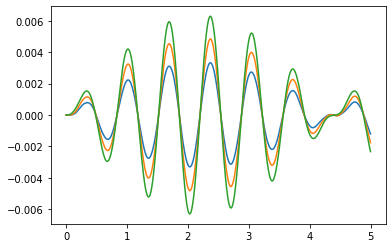

In [5]:
t0 = 0
t1 = 5

m1 = 10
m2 = 20
m3 = 50

k1 = 10000
k2 = 20000
k3 = 15000

c1 = 0
c2 = 0
c3 = 0

M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])
K = np.array([[(k1+k2),-k2,0],[-k2,(k3+k2),-k3],[0,-k3,k3]])
C = np.array([[(c1+c2),-c2,0],[-c2,(c3+c2),-c3],[0,-c3,c3]])


InitialConditions = np.array([0,0,0,0,0,0])

##Solving
res = 100000
t = np.linspace(t0,t1,res)
sol = SolveSystem(t)

##Plotting
plt.figure()
plt.plot(t,sol[:,0])
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,2])


# Modeshape solver 

In [7]:
#M = np.array([[20,0],[0,40]])
#K = np.array([[1000+2000,-2000],[-2000,2000]])



print('Mass Matrix:')
print(M)
print('Stiffness Matrix:')
print(K)

Eig_value,Eig_vector = eig(K,M)

Eig_vector = np.flip(Eig_vector,axis = 1)
Eig_vector = Eig_vector/Eig_vector[0,:]

w = np.sqrt(np.real(np.flip(Eig_value)))
#Get Hz
f = w / (2*np.pi)

for idx, i in enumerate(Eig_value):
    print('            ######### Mode',idx+1,'#########')
    print('Rotational Frequency:',w[idx],'[rad/s]')
    print('Frequency           :',f[idx],'[Hz]')
    print('Mode Shape          :',Eig_vector[:,idx])
    

Mass Matrix:
[[10  0  0]
 [ 0 20  0]
 [ 0  0 50]]
Stiffness Matrix:
[[ 30000 -20000      0]
 [-20000  35000 -15000]
 [     0 -15000  15000]]
            ######### Mode 1 #########
Rotational Frequency: 8.570227084552528 [rad/s]
Frequency           : 1.3639940039265777 [Hz]
Mode Shape          : [1.         1.4632756  1.93767531]
            ######### Mode 2 #########
Rotational Frequency: 32.198010966824405 [rad/s]
Frequency           : 5.124472603097161 [Hz]
Mode Shape          : [ 1.          0.98164404 -0.39973999]
            ######### Mode 3 #########
Rotational Frequency: 62.76813919098972 [rad/s]
Frequency           : 9.989859620926135 [Hz]
Mode Shape          : [ 1.         -0.46991965  0.03873135]


# Frequency responce

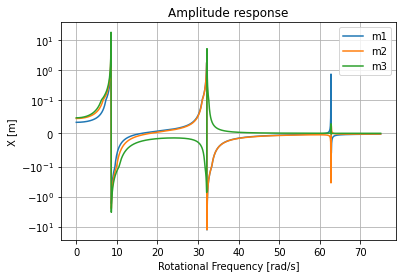

In [16]:
## Force vector
F = np.array([100,200,30])

def Amplitude(omega):
    X = []
    for i in omega:
        Z = (-(i**2)*M) + (i*(1j)*C) + K
        X.append(np.matmul(np.linalg.inv(Z),F).real)
    return np.ndarray.tolist(np.transpose(X))


w = np.linspace(0,75,1000)
Amp = Amplitude(w)


plt.figure()
plt.title('Amplitude response')
plt.xlabel('Rotational Frequency [rad/s]')
plt.ylabel('X [m]')
plt.yscale('symlog', linthresh=0.1)
for i in range(len(Amp)):
    plt.plot(w,Amp[i], label= 'm' + str(i+1))

plt.legend()
plt.grid()


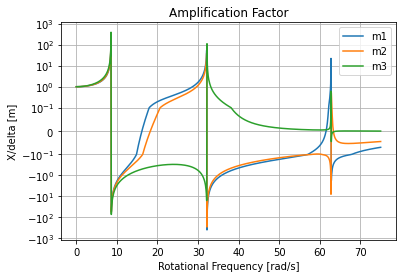

In [17]:
## Force vector
F = np.array([100,200,30])


def Amplification(omega):
    X = []
    delta = np.matmul(F,(np.linalg.inv(K)))
    for i in omega:
        Z = (-(i**2)*M) + (i*(1j)*C) + K
        X.append(np.divide(np.matmul(np.linalg.inv(Z),F).real,delta))
    return np.ndarray.tolist(np.transpose(X))


w = np.linspace(0,75,1000)
Amp = Amplification(w)


plt.figure()
plt.title('FRF (Frequency Responce Function)')
plt.xlabel('Rotational Frequency [rad/s]')
plt.ylabel('X/delta [m]')
plt.yscale('symlog', linthresh=0.1)
for i in range(len(Amp)):
    plt.plot(w,Amp[i], label= 'm' + str(i+1))

plt.legend()
plt.grid()

# Single plane balancing

In [1]:



def print_polar(n):
    print(cmath.polar(n)[0],'/__',360*cmath.polar(n)[1]/(2*cmath.pi),'deg')

def parallel(Zlist):
    ans = 0
    for i in Zlist:
        ans = ans + i**-1
    return ans**-1

def ComplexPolar(z,thetaDeg):
    return z*np.cos(math.radians(thetaDeg)) + z*np.sin(math.radians(thetaDeg))*1j

def Z_magnitude(n):
    return cmath.polar(n)[0]

def ComplexConjugate(N):
    return N.real - N.imag*1j

In [4]:
V = ComplexPolar(0.25,40) #### Original unbalance in [mm] and phase angle
W = ComplexPolar(170,-65)  #### Trail Massin [mm] and position

Vp = ComplexPolar(0.5,150) #### measured again

A = (Vp-V)/W
U = V/A
B = -U

print('Imbalance:')
print_polar(U)

print('Balance:')
print_polar(B)


Imbalance:
67.36660271258316 /__ 163.1377812784058 deg
Balance:
67.36660271258316 /__ -16.86221872159421 deg
